<a href="https://colab.research.google.com/github/yicjiang/H-and-M2/blob/main/Assignment3_Yicheng_Jiang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BA780 Assignment3 - Yicheng (Victor) Jiang 

## Data Preperation Stage

#### 1. Import data from GitHub and preview the information

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
heart_study = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv')

####2. Data descriptions

| Column Name | Description | Conversion|
|-------------|:------------|:------------|
|male| Sex of patient | No(0), Yes(1)|
|Gender| Sex of patient created base on **male** column | 0 (Female), 1 (Male)|
|age| Age in years at first examination|
|education | Educational levels | Some high school (1), high school/GED (2), some college/vocational school (3), college (4) |
| currentSmoker| Currently Smoke | No(0), Yes(1)|
| cigsPerDay | Number of cigarettes consumed each day |
| BPmeds | On blood pressure medication at time of first examination |  No(0), Yes(1) |
| prevalentStroke | Previously had a stroke | No(0), Yes(1)|
| prevalentHyp | Currently hypertensive | No(0), Yes(1)|
| diabetes | Currently has diabetes | No(0), Yes(1)|
|totChol| Total cholesterol (mg/dL) |
|sysBP | Systolic blood pressure |
|diaBP | Diastolic blood pressure |
|BMI | Body Mass Index, weight (kg)/height (m)2 |
|heartRate | Heart rate (beats/minute) |
|glucose | Blood glucose level (mg/dL) |
|TenYearCHD|Whether or not a patient experienced CHD within 10 years of first examination|No(0), Yes(1) |



1.  There are 4240 rows/records and 16 columns in heart_studay data frame. Based on this observation and the output given by the info function, following columns contain the missing values: 

     **education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose**

In [5]:
heart_study.shape

(4240, 16)

In [6]:
heart_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
heart_study.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


2. Check the data quality by exam the maximum values and minium values. All categorical values return results meet the expection as the conversion table and there are no negative values in each column.

In [8]:
heart_study.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### 3. Data Validation Check (Validation & Null Check)

* In order to ensure that all null values are dropped or replaced in the data frame, the **isnull** sytnex is performed.  

1. Check the data duplication, drop duplicated rows if there is any.

In [9]:
## There is no duplicated rows
heart_study[heart_study.duplicated()].shape[0]

0

2. *Data validation check base on both currentSmoker and cigsPerDay.* 
In order to make sure people who is a currentSmoker has value that greater than 0 and that cannot be null in the heart_study dataframe, the following flow chart and steps being created: 




*   Filter out **currentSmoker** is True (currentSmoker = 1), but has null value or value equals to 0 in the column of **cigsPerDay**, then drop those columns. Since the value of cigsPerDay various from person to person and variable has a huge impact on health condition variables and the result, ambiguous variable like median and mean is not used.

*   Filter out **currentSmoker** is True (currentSmoker = 0), but has null value or value not equals to 0 in the column of **cigsPerDay**, then drop those columns. If it is null in the column, then fill with 0.

In [10]:
print(heart_study[heart_study['currentSmoker'] == 1].shape[0])
print(heart_study[heart_study['currentSmoker'] == 0].shape[0])

2095
2145


As the result, 29 rows with currentSmoker is 1 but has invalid data or null in cigsPerDay dropped

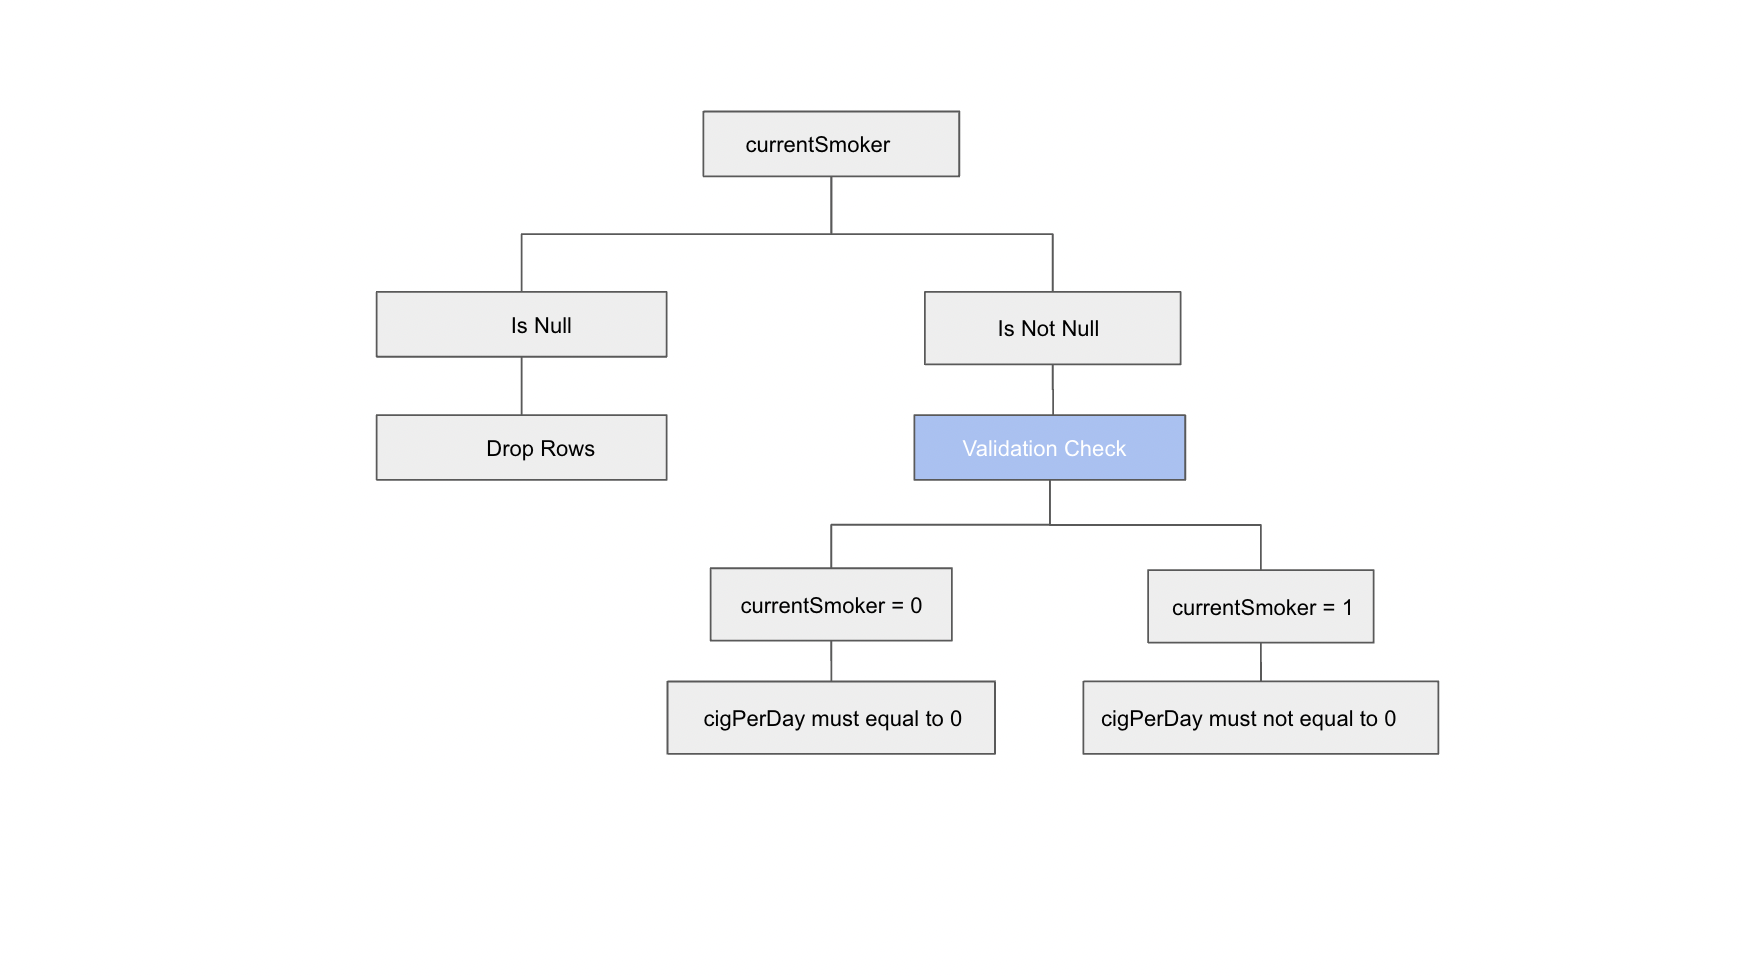

**Step1:** Filtering out currentSmoker is True **(currentSmoker = 1)**, but **has null value or value equals to 0** in the column of cigsPerDay. As the result 29 rows being droped.



In [11]:
## Create the filter to drop invalid data
drop_filtering =  ((heart_study['currentSmoker'] == 1) & (heart_study['cigsPerDay'].isnull())) | \
                  ((heart_study['currentSmoker'] == 1) & (heart_study['cigsPerDay'] == 0))
heart_study[drop_filtering].shape[0]

29

In [12]:
index = heart_study.loc[drop_filtering,:].index

In [13]:
## display the partial dropped data
heart_study.loc[index,:].head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0


In [14]:
heart_study = heart_study.drop(index,axis = 0)

In [15]:
## verify the rows being dropped

drop_filtering = ((heart_study['currentSmoker'] == 1) & (heart_study['cigsPerDay'].isnull()) |
             (heart_study['currentSmoker'] == 1) & (heart_study['cigsPerDay'] == 0.0))

index = heart_study.loc[drop_filtering,:].index

heart_study.loc[index,:].head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**Step2:** Filtering out currentSmoker is False (currentSmoker = 0). If there are any value larger than 0 in cigsPerDay column, then drop out these rows. Furthermore, if there are null value then convert those into 0. 



According to the validation check there are no rows need be dropped

In [16]:
drop_filtering2 = ((heart_study['currentSmoker'] == 0) & (heart_study['cigsPerDay'].isnull()) |
             (heart_study['currentSmoker'] == 0) & (heart_study['cigsPerDay'] != 0.0))

In [17]:
index2 = heart_study.loc[drop_filtering2,:].index
len(index2)

0

3. There are 103 nulls in education column. Fill those null rows with mode, since the education is a type of categorical variable and need be specific value in range from 1 to 4. *(1), high school/GED (2), some college/vocational school (3), college (4)*


In [18]:
heart_study['education'].isnull().sum()

103

In [19]:
heart_study['education'] = heart_study['education'].fillna(heart_study['education'].mode()[0])

In [20]:
heart_study['education'].isnull().sum()

0

4. There are 53 nulls in BPMeds column. Mode strategy is continue to be used in this column. (0 = No, 1 = Yes)

In [21]:
heart_study['BPMeds'].isnull().sum()

53

In [22]:
heart_study['BPMeds'] = heart_study['BPMeds'].fillna(heart_study['BPMeds'].mode()[0])

In [23]:
## check if there are any nulls in BPMeds
heart_study['BPMeds'].isnull().sum()

0

5. Fill the missing values in totChol, BMI, heartRate,and glucose columns with median. Median strategy is used cause it has least impact by the outliers.

In [24]:
heart_study[['totChol','BMI','heartRate','glucose']] = heart_study[['totChol','BMI','heartRate','glucose']] \
.fillna(heart_study[['totChol','BMI','heartRate','glucose']].median())

In [25]:
## check if all nulls being replace in above columns
(heart_study['totChol'].isnull().sum() &
heart_study['BMI'].isnull().sum() & 
heart_study['heartRate'].isnull().sum() & 
heart_study['glucose'].isnull().sum()) == 0

True

## High-level aggregation and Visualization

1. From the Correlation Matrix Heatmap, the correlation between the target variable - TenYearCHD in either No(0) Yes(1) - and independent variables is observed. Throughout the visulation, following top 5 variables have strong correlation with **TenYearCHD**:
  
  **age | prevalentHyp | sysBP | diaBP | glucose**

Text(0.5, 1.0, 'Correlation Matrix')

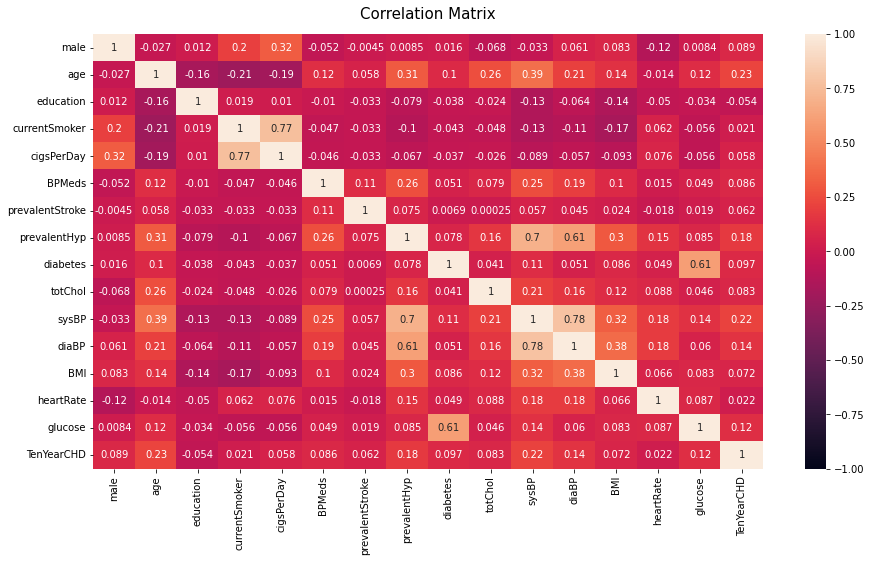

In [ ]:
heart_study_corr = heart_study.corr()
plt.figure(figsize=(15, 8 ))
heatmap = sns.heatmap(heart_study_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':15}, pad=15)

In [68]:
heart_study[heart_study['TenYearCHD'] == 1].shape[0]

642

In [69]:
heart_study[heart_study['TenYearCHD'] == 0].shape[0]

3569

In [53]:
heart_study.pivot_table(heart_study[['diaBP','age','glucose','BMI','heartRate','totChol','cigsPerDay']],index="TenYearCHD",aggfunc=[np.median])

median                                               
              BMI age cigsPerDay diaBP glucose heartRate totChol
TenYearCHD                                                      
0           25.26  48        0.0  81.0    78.0      75.0   233.0
1           26.09  55        2.5  85.5    78.0      75.0   240.5

In [59]:
heart_study.pivot_table(heart_study[['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']],index="TenYearCHD",aggfunc=[mode])

mode                                                     \
           BPMeds currentSmoker diabetes education male prevalentHyp   
TenYearCHD                                                             
0             0.0             0        0       1.0    0            0   
1             0.0             1        0       1.0    1            1   

                            
           prevalentStroke  
TenYearCHD                  
0                        0  
1                        0

In [76]:
heart_study.pivot_table(heart_study[['cigsPerDay']],index=heart_study[["TenYearCHD","male"]],aggfunc=[np.mean])

mean
                cigsPerDay
TenYearCHD male           
0          0      5.737767
           1     12.993169
1          0      5.673333
           1     14.976608